In this final notebook I have consilidated all the visuals created in python. I do not add an additional comment since the graph are discussed at length in the main article. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pres_election.csv')
df_pop = pd.read_csv('pres_pop_vote.csv')
df = df.loc[df['state'] != 'DISTRICT OF COLUMBIA']
df_diff = pd.read_csv('diff_data.csv')
df_county = pd.read_csv('pres_election_county.csv')

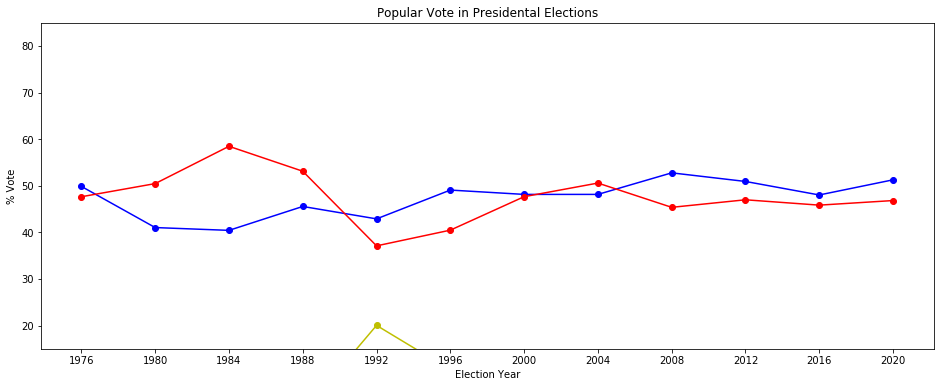

In [4]:
plt.figure(figsize = (16,6))
plt.xticks(np.arange(1976, 2024, step=4))
plt.ylim(15,85)
plt.plot(df_pop['year'],(df_pop['DEMOCRAT_%']*100),'-bo')
plt.plot(df_pop['year'],(df_pop['REPUBLICAN_%']*100),'-ro')
plt.plot(df_pop['year'],(df_pop['OTHER_%']*100),'-yo')


plt.title('Popular Vote in Presidental Elections')
plt.xlabel('Election Year')
plt.ylabel('% Vote')

plt.show()

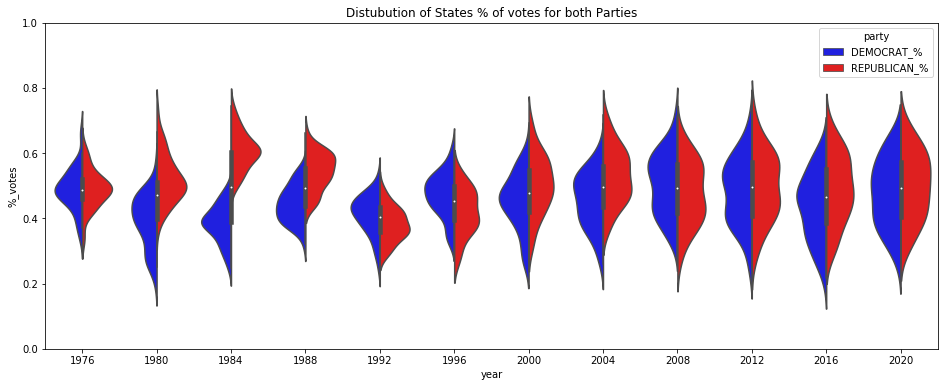

In [5]:
df_temp = df[['year','state','DEMOCRAT_%','REPUBLICAN_%']].melt(id_vars = ['year','state'], var_name = 'party',
                                                               value_name = '%_votes')

plt.figure(figsize = (16,6))
sns.violinplot(x = 'year', y = '%_votes',hue = 'party', data = df_temp, 
               split = 'True', palette = {'DEMOCRAT_%': 'b', 'REPUBLICAN_%': 'r'})
plt.ylim(0,1)
plt.title('Distubution of States % of votes for both Parties')
plt.show()

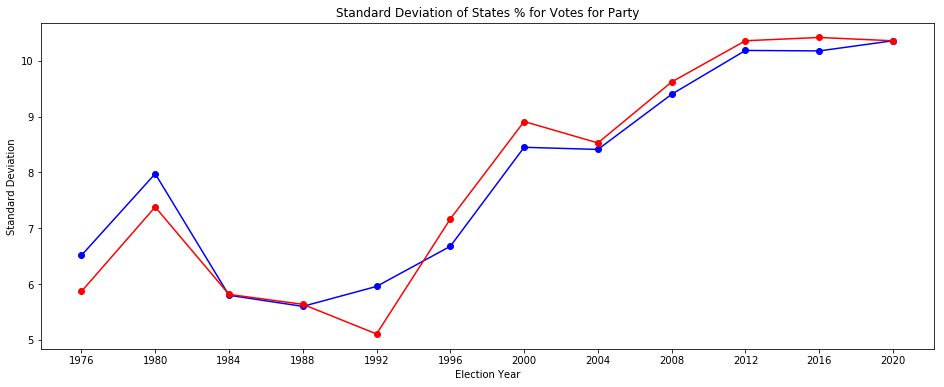

In [6]:
df_temp = df[['year','DEMOCRAT_%','REPUBLICAN_%']].groupby(['year']).std().reset_index()


plt.figure(figsize = (16,6))
plt.xticks(np.arange(1976, 2024, step=4))
plt.plot(df_temp['year'],(df_temp['DEMOCRAT_%']*100),'-bo')
plt.plot(df_temp['year'],(df_temp['REPUBLICAN_%']*100),'-ro')


plt.title('Standard Deviation of States % for Votes for Party')
plt.xlabel('Election Year')
plt.ylabel('Standard Deviation')

plt.show()

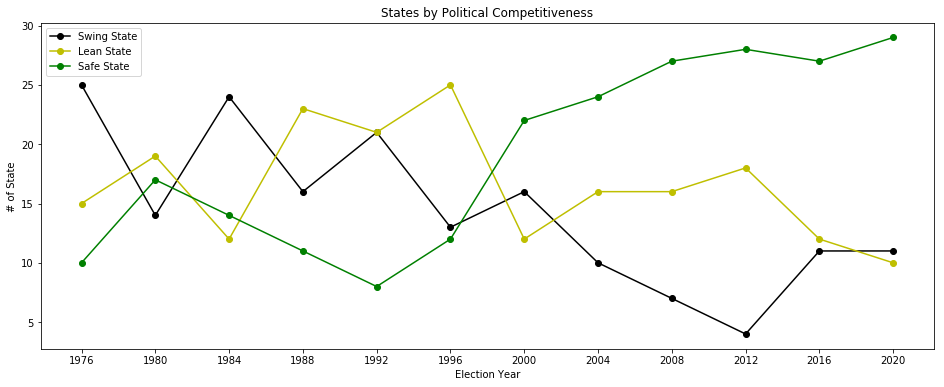

In [7]:
df_temp = df_diff.groupby(['year', 'Status']).size().unstack(fill_value=0).reset_index()


plt.figure(figsize = (16,6))
plt.xticks(np.arange(1976, 2024, step=4))
plt.plot(df_temp['year'],df_temp['Swing'],'-ko', label = 'Swing State')
plt.plot(df_temp['year'],df_temp['Lean'],'-yo', label = 'Lean State')
plt.plot(df_temp['year'],df_temp['Safe'],'-go', label = 'Safe State')
plt.legend(title = "")

plt.title('States by Political Competitiveness')
plt.xlabel('Election Year')
plt.ylabel('# of State')

plt.show()

In [21]:
states_dict = {'inner south':['ALABAMA','ARKANSAS','KENTUCKY','LOUISIANA','MISSISSIPPI',
                              'MISSOURI','SOUTH CAROLINA','TENNESSEE','WEST VIRGINIA']}

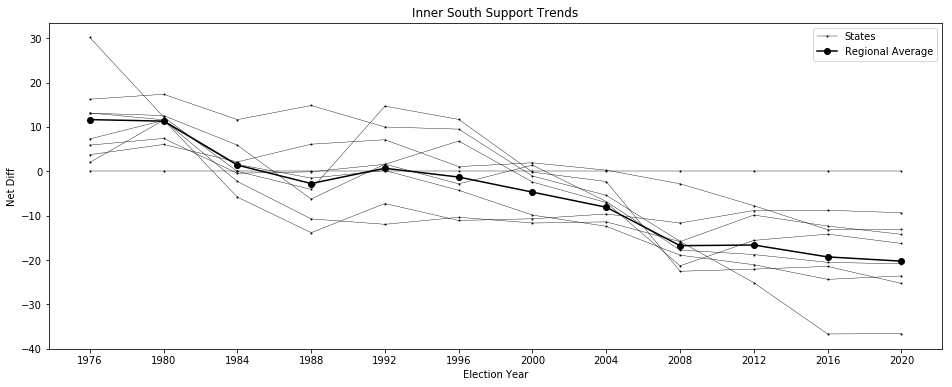

In [57]:
states = ['ALABAMA','ARKANSAS','KENTUCKY','LOUISIANA','MISSISSIPPI',
                              'MISSOURI','SOUTH CAROLINA','TENNESSEE','WEST VIRGINIA']

plt.figure(figsize = (16,6))

plt.plot(df_temp['year'],df_temp['Net_Diff'] == states[0],'-ko',linewidth = .4,markersize = 1, label = "States")

for s in states[1:]: 
    df_temp = df_diff.loc[df_diff['state'] == s,['year','Net_Diff']]
    plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "")

df_temp = df_diff.loc[df_diff['state'].isin(states),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label='Regional Average')

plt.legend(title = "")    
plt.title("Inner South Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')

plt.xticks(np.arange(1976, 2024, step=4))
plt.show()

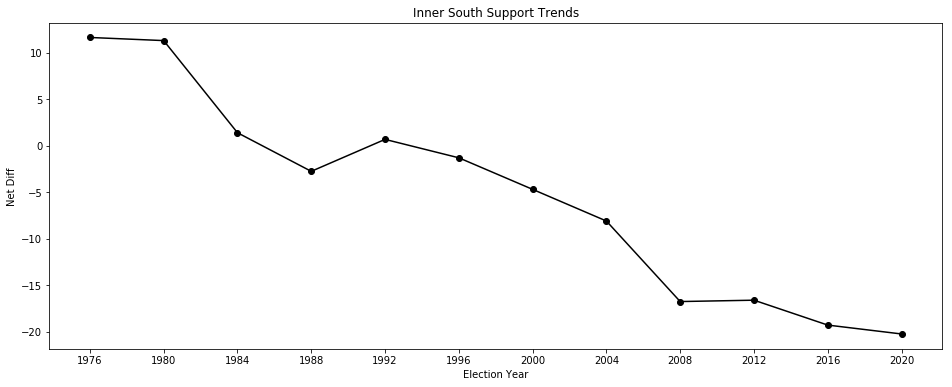

In [28]:
states = states_dict['inner south']

df_temp = df_diff.loc[df_diff['state'].isin(states),['year','Net_Diff']].groupby(['year']).mean().reset_index()

plt.figure(figsize = (16,6))

plt.title("Inner South Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')


plt.xticks(np.arange(1976, 2024, step=4))
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko')
plt.show()

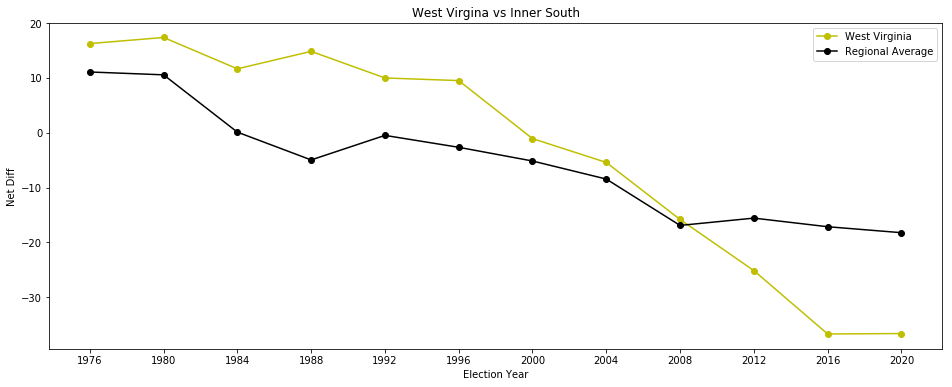

,year,Net_Diff
0,1976,11.071155
1,1980,10.553275
2,1984,0.112620
3,1988,-4.957827
4,1992,-0.483742
5,1996,-2.653791
6,2000,-5.152236
7,2004,-8.441335
8,2008,-16.891939
9,2012,-15.561379


In [43]:
plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == 'WEST VIRGINIA',['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-yo', label = 'West Virginia')

df_temp = df_diff.loc[df_diff['state'].isin(states[:-1]),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label = 'Regional Average')

plt.legend(title = "")    
plt.title("West Virgina vs Inner South")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')
plt.xticks(np.arange(1976, 2024, step=4))

plt.show()

df_temp

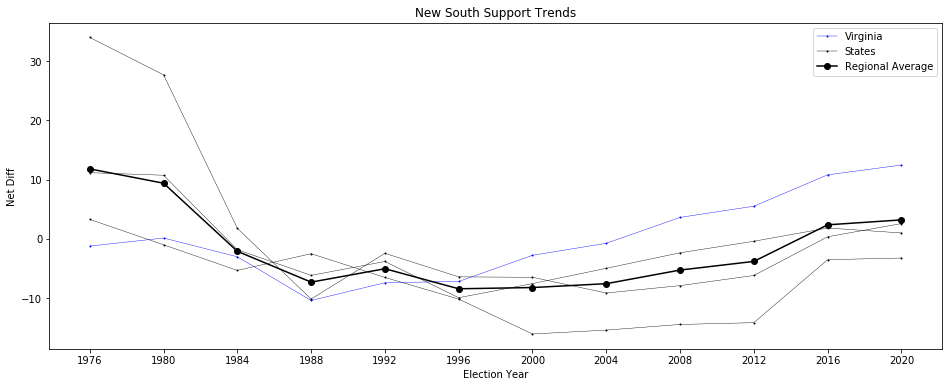

In [58]:
states = ['VIRGINIA','NORTH CAROLINA','TEXAS','GEORGIA']

plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == states[0],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-bo',linewidth = .4,markersize = 1, label = "Virginia")

df_temp = df_diff.loc[df_diff['state'] == states[1],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "States")


for s in states[2:]: 
    df_temp = df_diff.loc[df_diff['state'] == s,['year','Net_Diff']]
    plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "")

df_temp = df_diff.loc[df_diff['state'].isin(states),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label='Regional Average')

plt.legend(title = "")    
plt.title("New South Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')

plt.xticks(np.arange(1976, 2024, step=4))
plt.show()

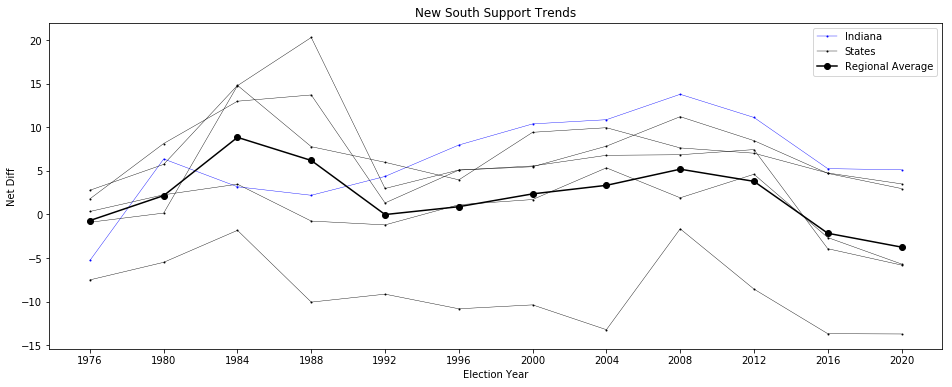

In [3]:
states = ['MICHIGAN',
    'INDIANA',
'IOWA',
'OHIO',
'PENNSYLVANIA',
'WISCONSIN']

plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == 'MICHIGAN',['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-bo',linewidth = .4,markersize = 1, label = "Indiana")


df_temp = df_diff.loc[df_diff['state'] == states[1],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "States")


for s in states[2:]: 
    df_temp = df_diff.loc[df_diff['state'] == s,['year','Net_Diff']]
    plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "")

df_temp = df_diff.loc[df_diff['state'].isin(states[1:]),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label='Regional Average')

plt.legend(title = "")    
plt.title("New South Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')

plt.xticks(np.arange(1976, 2024, step=4))
plt.show()

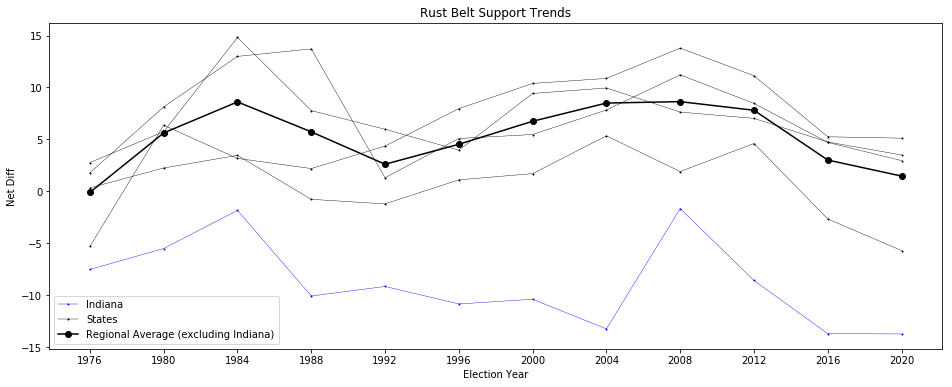

In [14]:
states = ['INDIANA'
'IOWA',
'MICHIGAN',
'OHIO',
'WISCONSIN',
'PENNSYLVANIA']

plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == 'INDIANA',['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-bo',linewidth = .4,markersize = 1, label = "Indiana")


df_temp = df_diff.loc[df_diff['state'] == states[1],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "States")


for s in states[2:]: 
    df_temp = df_diff.loc[df_diff['state'] == s,['year','Net_Diff']]
    plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "")

df_temp = df_diff.loc[df_diff['state'].isin(states),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label='Regional Average (excluding Indiana)')

plt.legend(title = "")    
plt.title("Rust Belt Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')

plt.xticks(np.arange(1976, 2024, step=4))
plt.show()

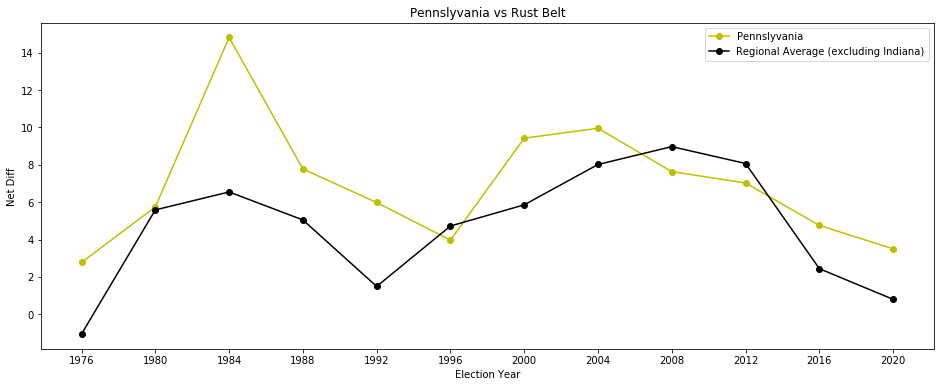

In [15]:
plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == 'PENNSYLVANIA',['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-yo', label = 'Pennslyvania')

df_temp = df_diff.loc[df_diff['state'].isin(states[1:-1]),['year','Net_Diff']].groupby(['year']).mean().reset_index()
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko', label = 'Regional Average (excluding Indiana)')

plt.legend(title = "")    
plt.title("Pennslyvania vs Rust Belt")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')
plt.xticks(np.arange(1976, 2024, step=4))

plt.show()

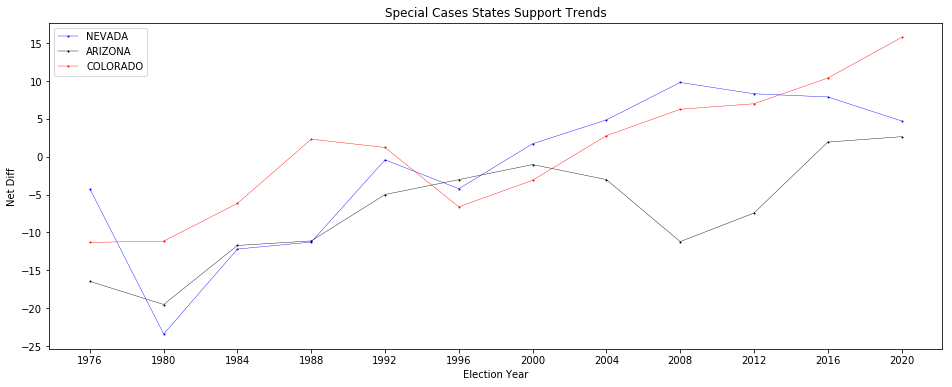

In [5]:
states = ['NEVADA','ARIZONA','COLORADO']

plt.figure(figsize = (16,6))

df_temp = df_diff.loc[df_diff['state'] == states[0],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-bo',linewidth = .4,markersize = 1, label = "NEVADA")

df_temp = df_diff.loc[df_diff['state'] == states[1],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ko',linewidth = .4,markersize = 1, label = "ARIZONA")

df_temp = df_diff.loc[df_diff['state'] == states[2],['year','Net_Diff']]
plt.plot(df_temp['year'],df_temp['Net_Diff'],'-ro',linewidth = .4,markersize = 1, label = "COLORADO")

plt.legend(title = "")    
plt.title("Special Cases States Support Trends")
plt.xlabel('Election Year')
plt.ylabel('Net Diff')

plt.xticks(np.arange(1976, 2024, step=4))
plt.show()

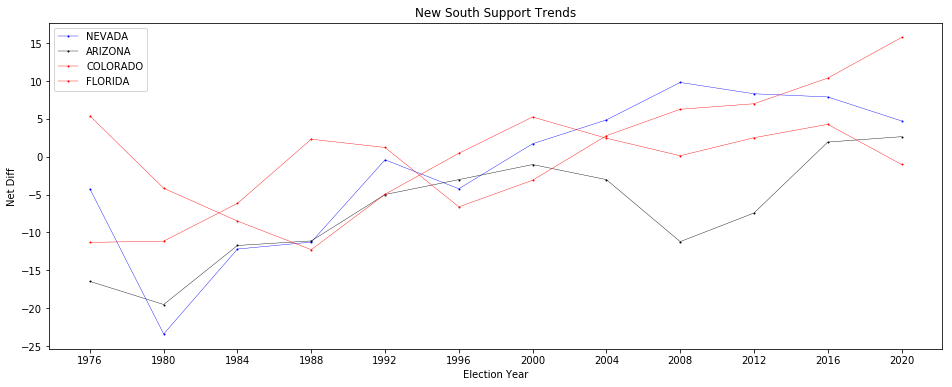

In [8]:
df_temp = df[['year','state','DEMOCRAT_%','REPUBLICAN_%']].melt(id_vars = ['year','state'], var_name = 'party',
                                                               value_name = '%_votes')

plt.figure(figsize = (16,6))
sns.violinplot(x = 'year', y = '%_votes',hue = 'party', data = df_temp, 
               split = 'True', palette = {'DEMOCRAT_%': 'b', 'REPUBLICAN_%': 'r'})
plt.ylim(0,1)
plt.title('Distubution of States % of votes for both Parties')
plt.show()

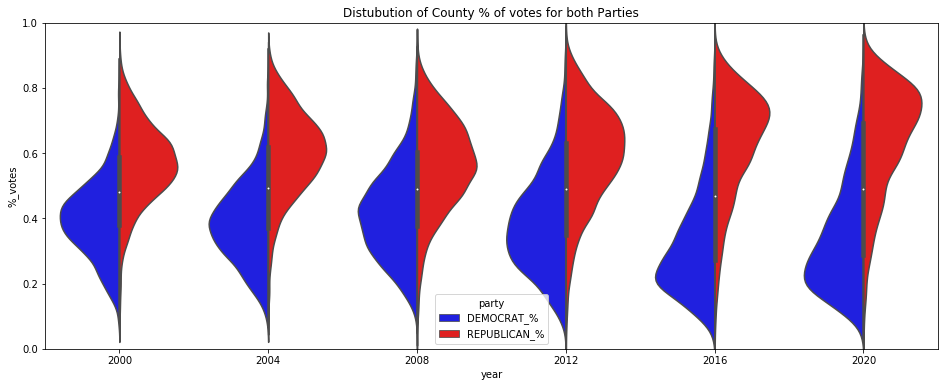

In [3]:
df_temp = df_county[['year','state','DEMOCRAT_%','REPUBLICAN_%']].melt(id_vars = ['year','state'], var_name = 'party',
                                                               value_name = '%_votes')

plt.figure(figsize = (16,6))
sns.violinplot(x = 'year', y = '%_votes',hue = 'party', data = df_temp, 
               split = 'True', palette = {'DEMOCRAT_%': 'b', 'REPUBLICAN_%': 'r'})
plt.ylim(0,1)
plt.title('Distubution of County % of votes for both Parties')
plt.show()

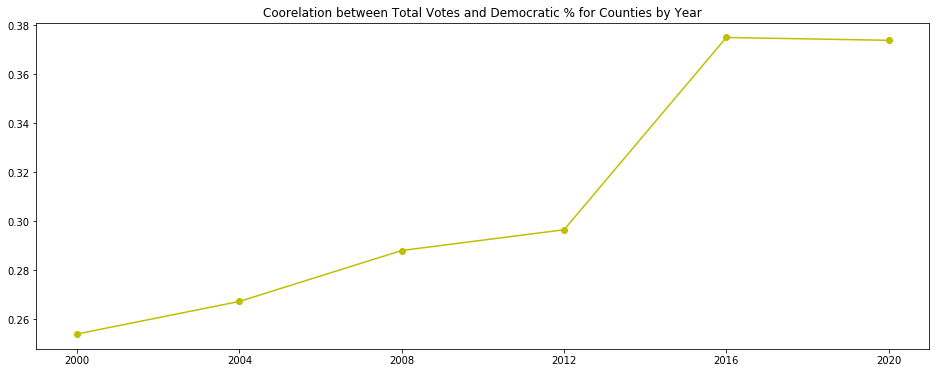

In [4]:
df_temp = df_county.groupby('year')[['TOTAL','DEMOCRAT_%']].corr()

df_temp = df_temp.swaplevel().loc['TOTAL','DEMOCRAT_%']

plt.figure(figsize = (16,6))
plt.title("Coorelation between Total Votes and Democratic % for Counties by Year")
plt.xticks(np.arange(1976, 2024, step=4))
plt.plot(df_temp.index,df_temp.values,'-yo')
plt.show()